Alucar - Analisando as vendas

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
print("Quantidade de linhas e colunas")
alucar.shape

Quantidade de linhas e colunas


(24, 2)

In [ ]:
print("Quantidade de dados nulos")
alucar.isna().sum().sum()

Quantidade de dados nulos


0

In [ ]:
alucar["mes"]=pd.to_datetime(alucar["mes"])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
print(sns.__version__)

0.13.1


<Axes: xlabel='mes', ylabel='vendas'>

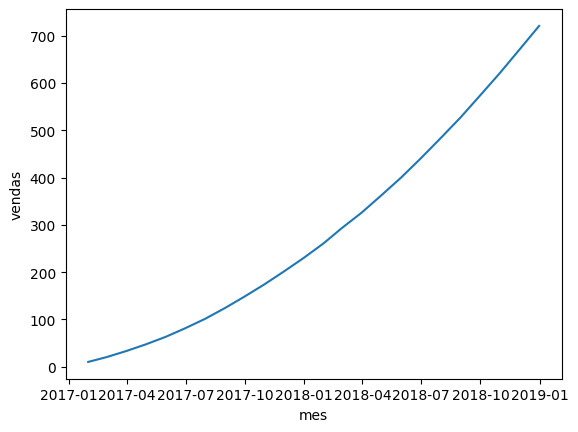

In [ ]:
sns.lineplot(x='mes',y='vendas', data=alucar)

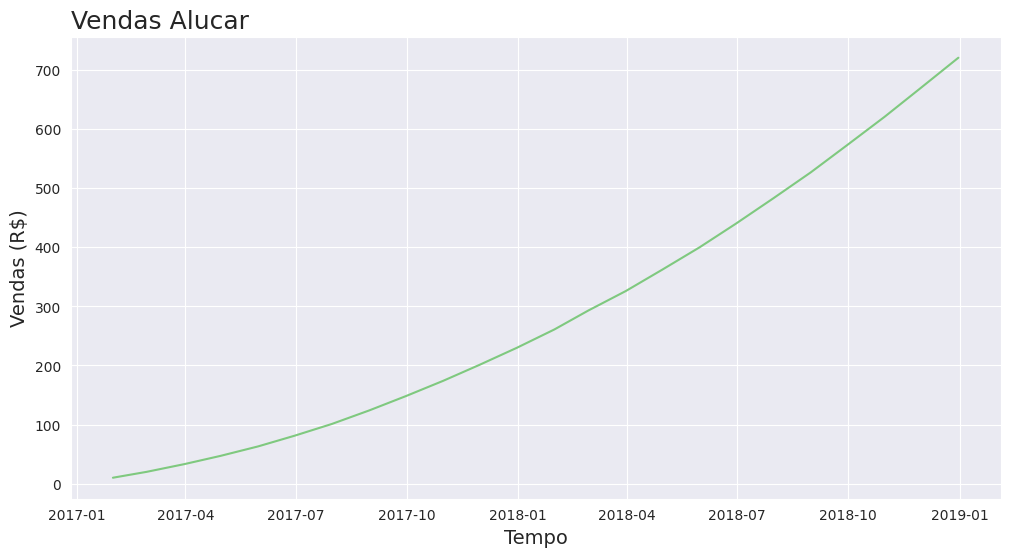

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar', loc="left", fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


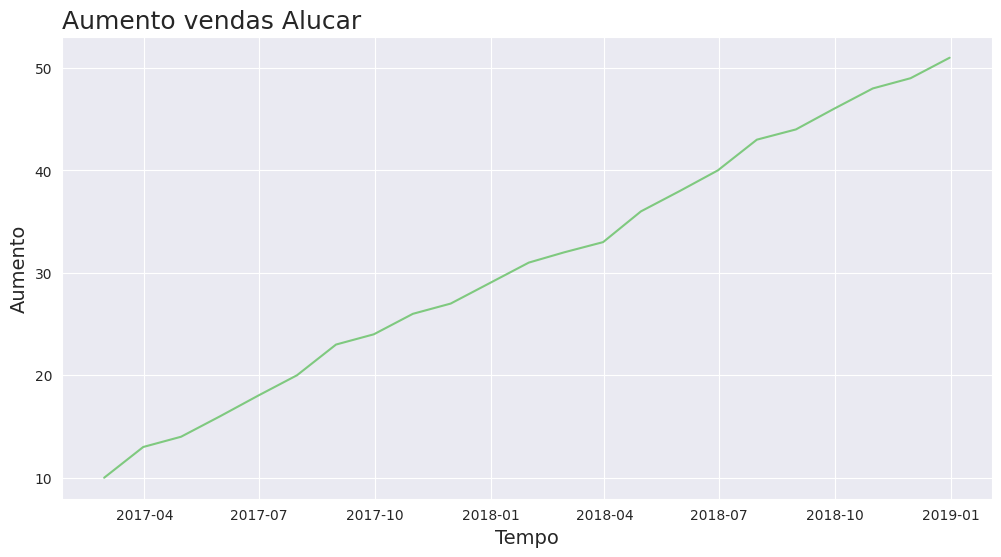

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento vendas Alucar', loc="left", fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax=ax

In [ ]:
def plotar(titulo,labelx,labely,x,y,dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x,y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc="left", fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax=ax

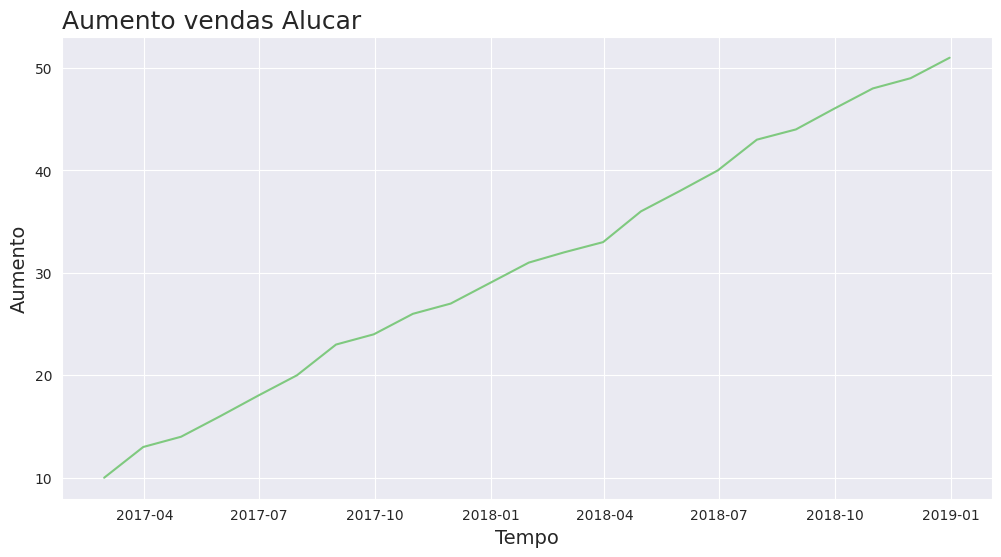

In [ ]:
plotar("Aumento vendas Alucar","Tempo","Aumento","mes","aumento",alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()


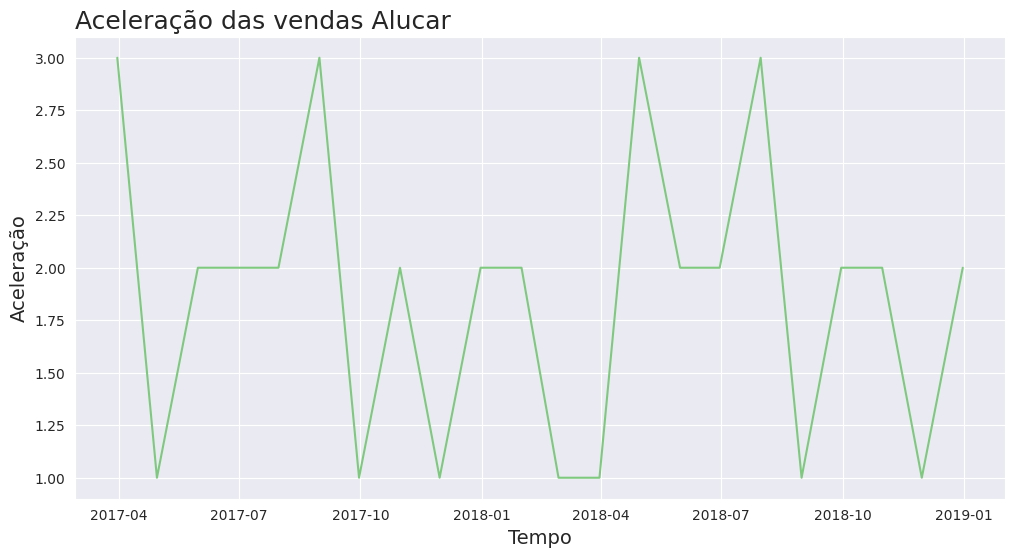

In [ ]:
plotar('Aceleração das vendas Alucar', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

<Axes: title={'left': 'Análise da alucar'}, xlabel='mes', ylabel='vendas'>

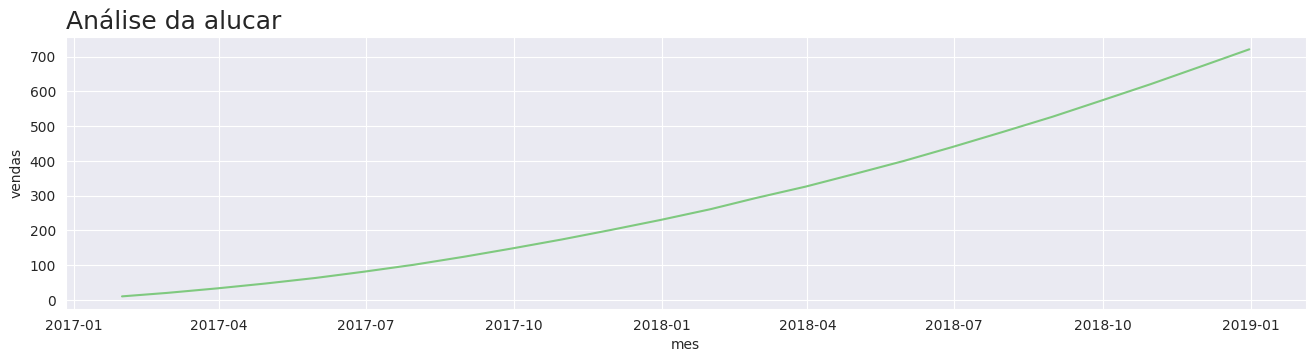

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise da alucar', fontsize = 18, loc='left')
sns.lineplot(x='mes',y='vendas', data=alucar)

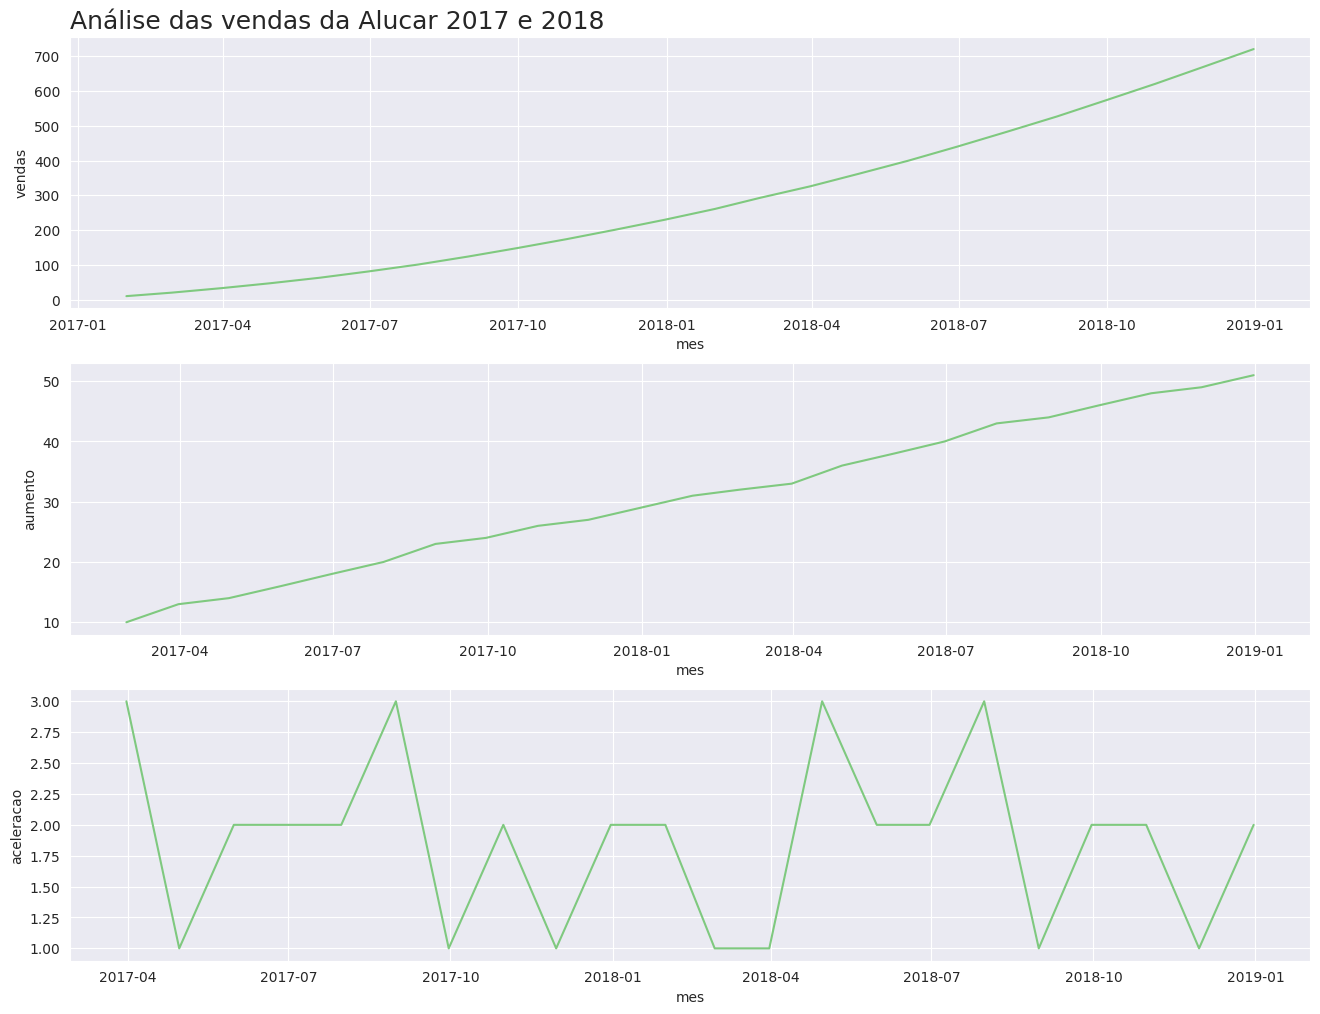

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

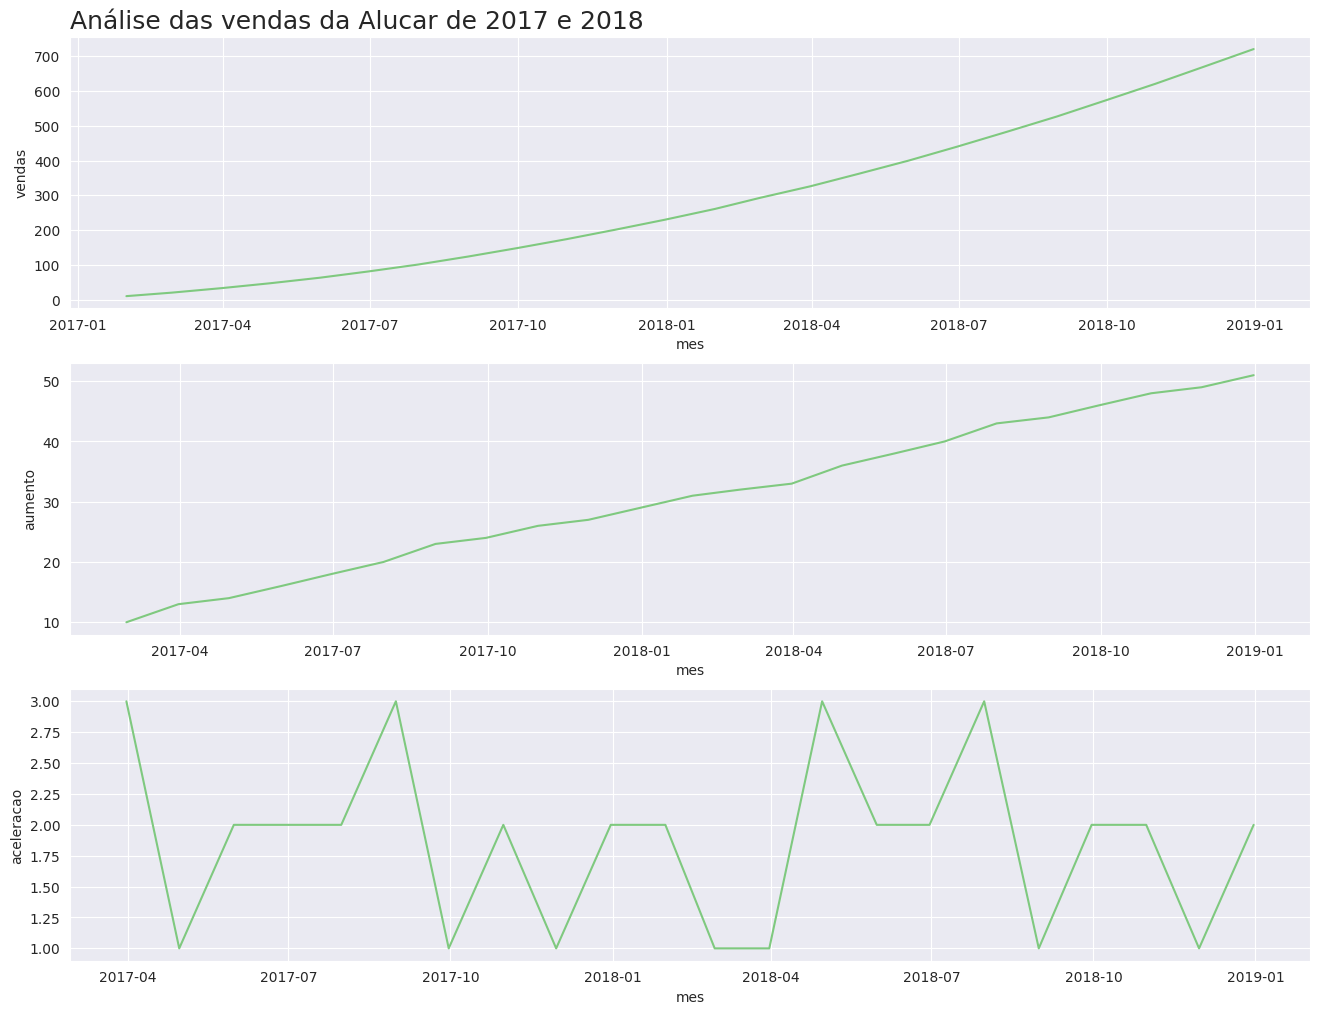

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018')

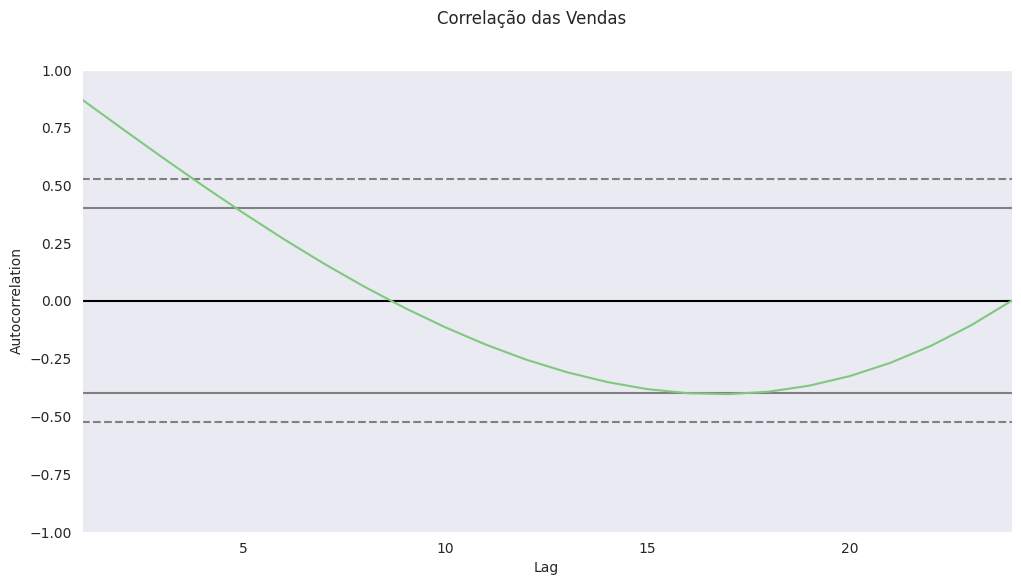

In [ ]:
##autocorrelação
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas')
autocorrelation_plot(alucar['vendas'])
ax=ax


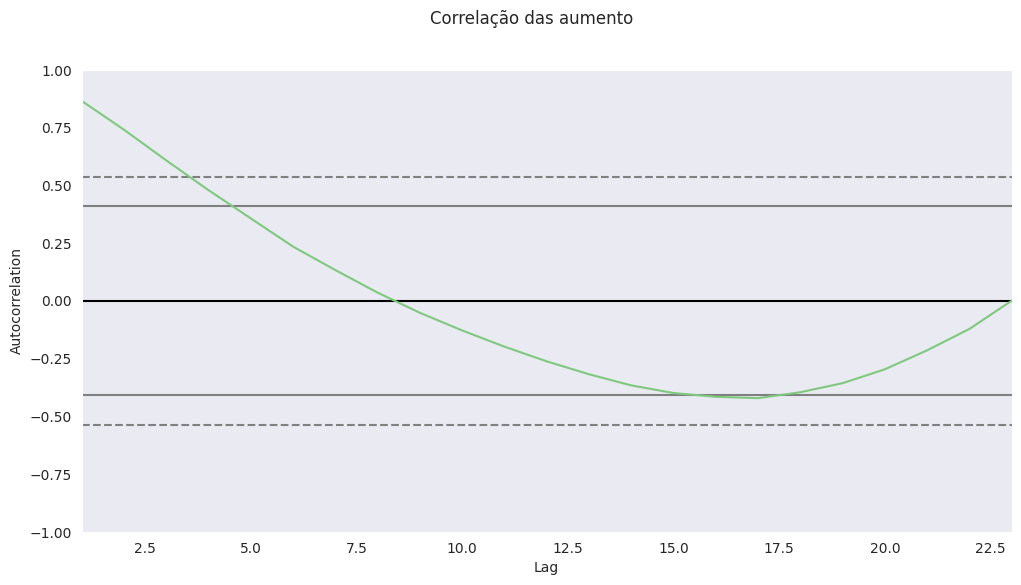

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aumento')
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

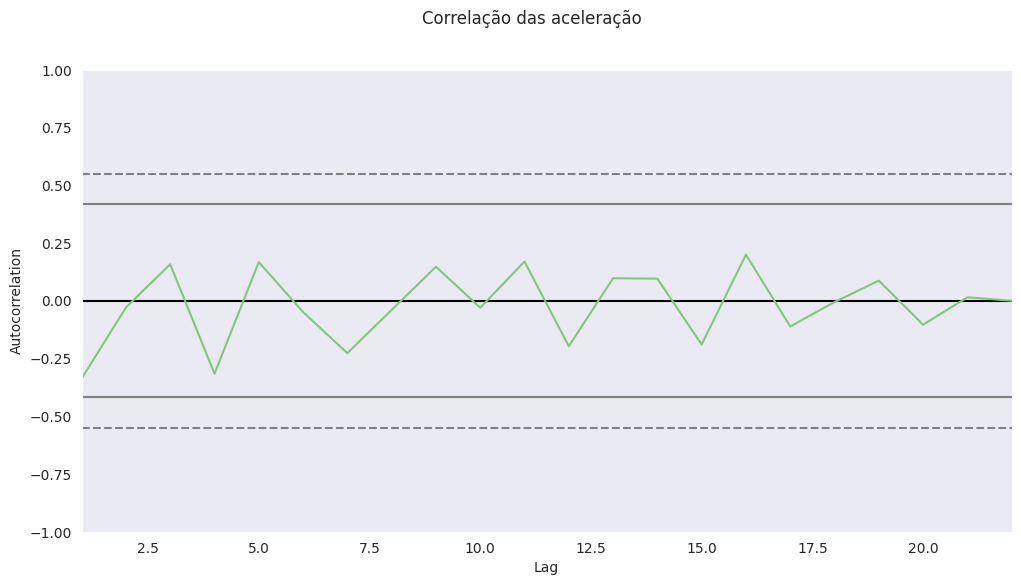

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleração')
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [ ]:
# mes para datetime e aumento e aceleração dos assinantes
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()
assinantes.dtypes
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


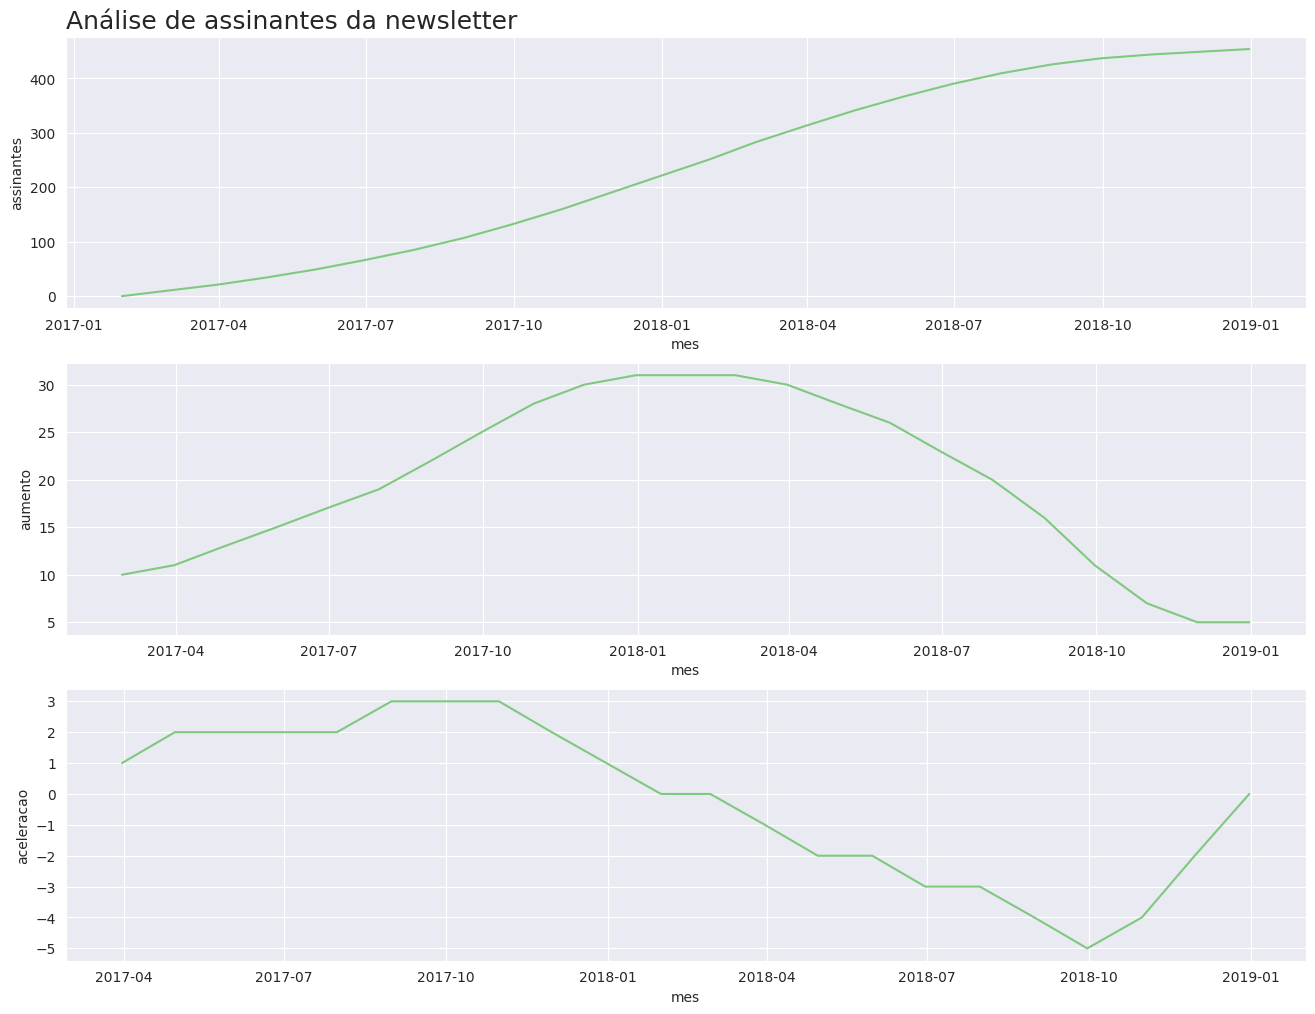

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# chocolura - analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')

In [ ]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
#auemnto e aceleração
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


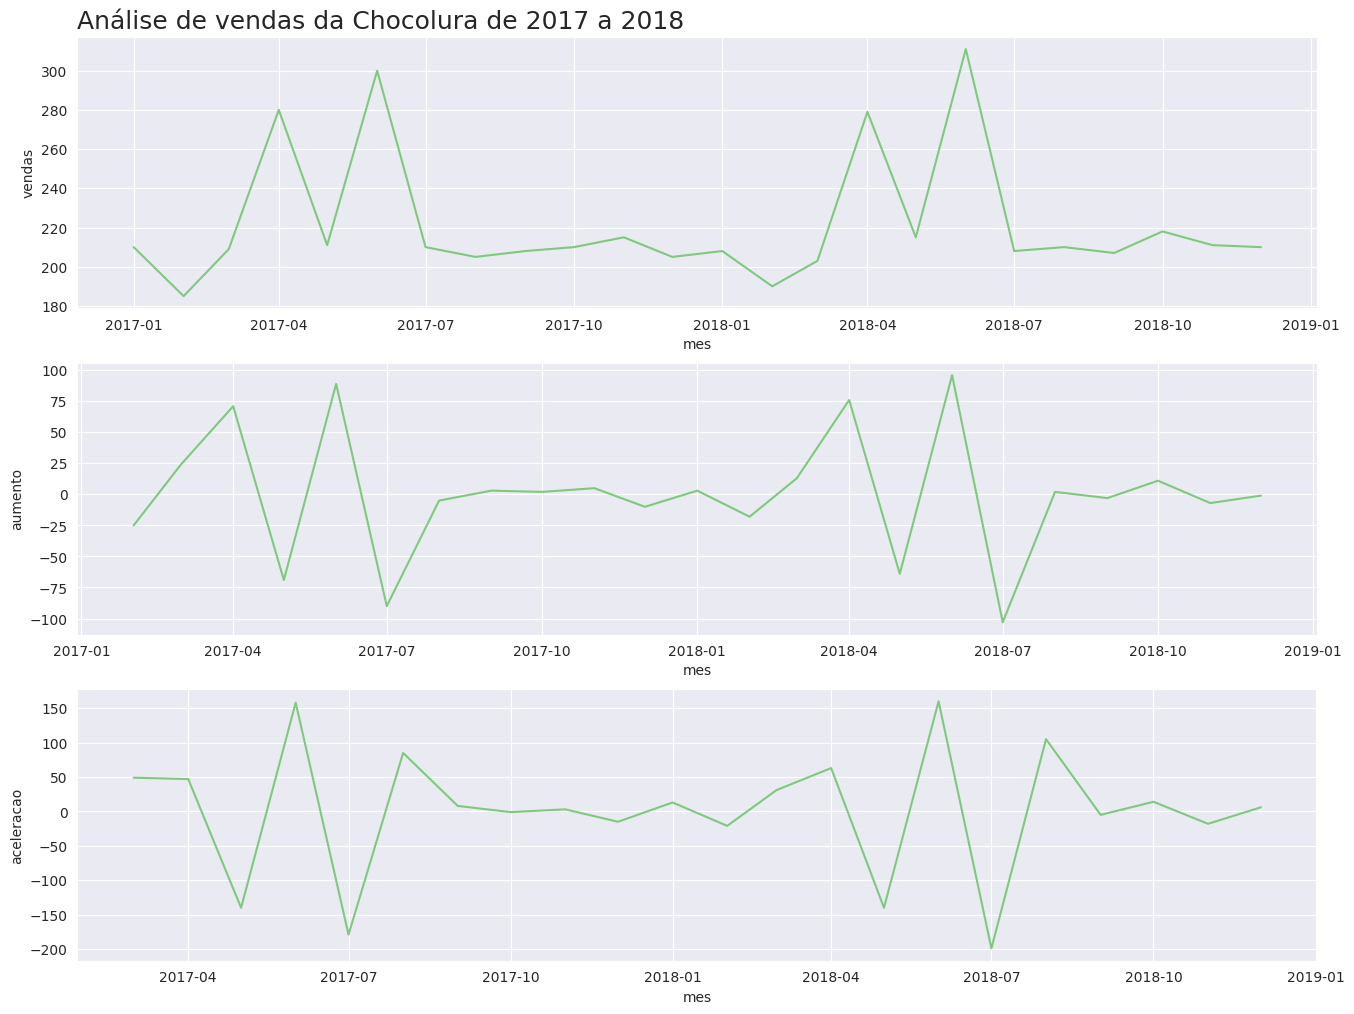

In [ ]:
#sazonalidade
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# chocolura - vendas diárias outubro e novembro

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

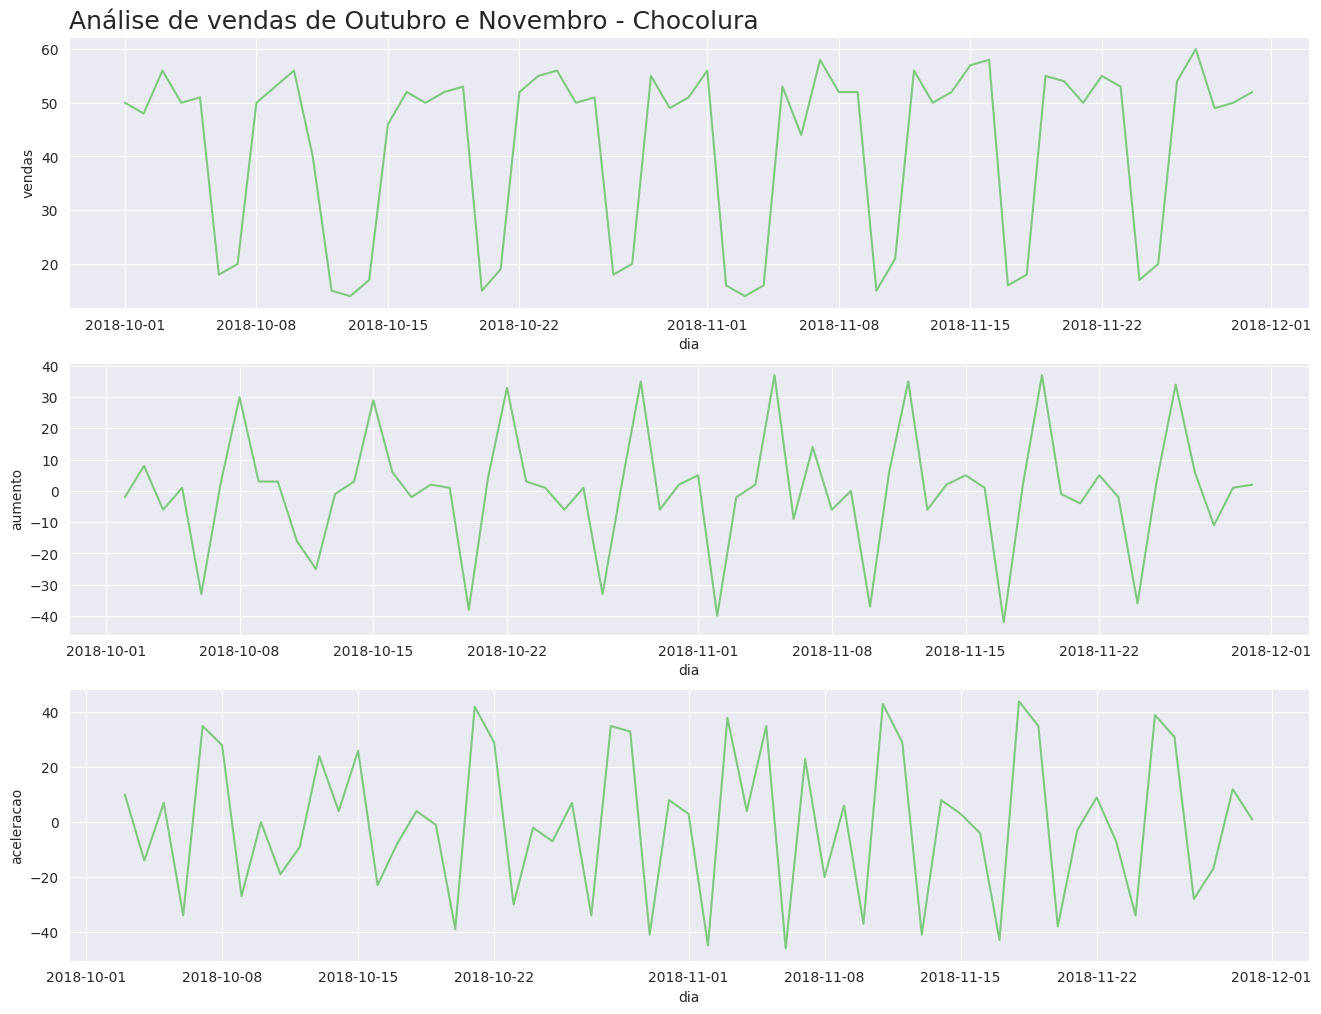

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

# analisando a sazonalidade

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


# agrupando os dias

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-44-38016381f919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


# correlação das vendas diárias

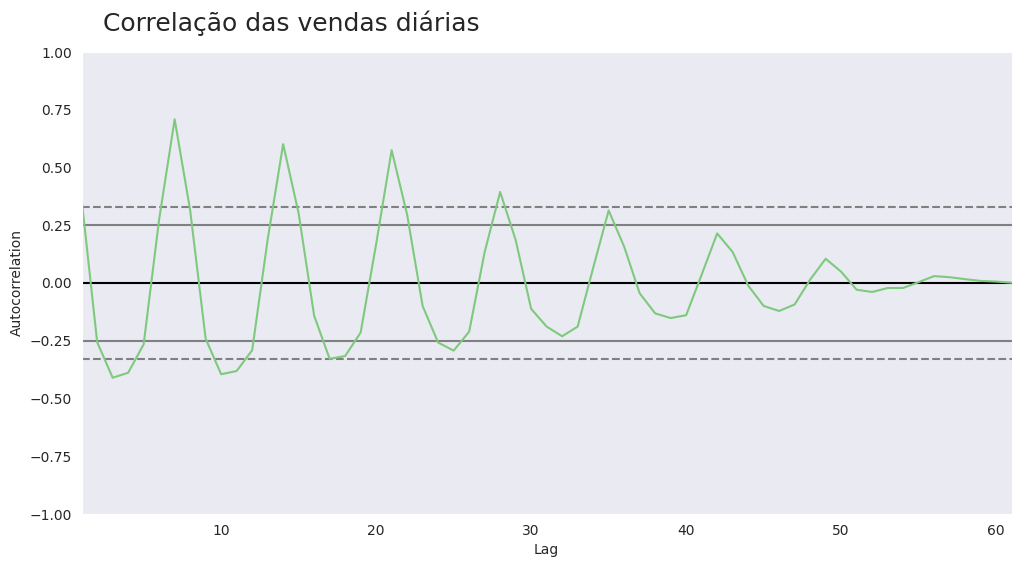

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

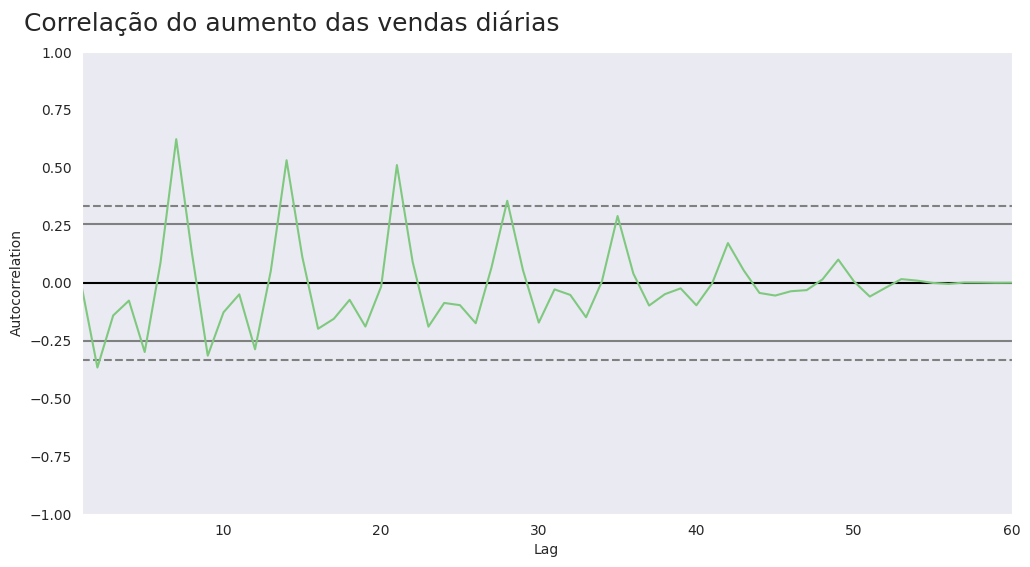

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

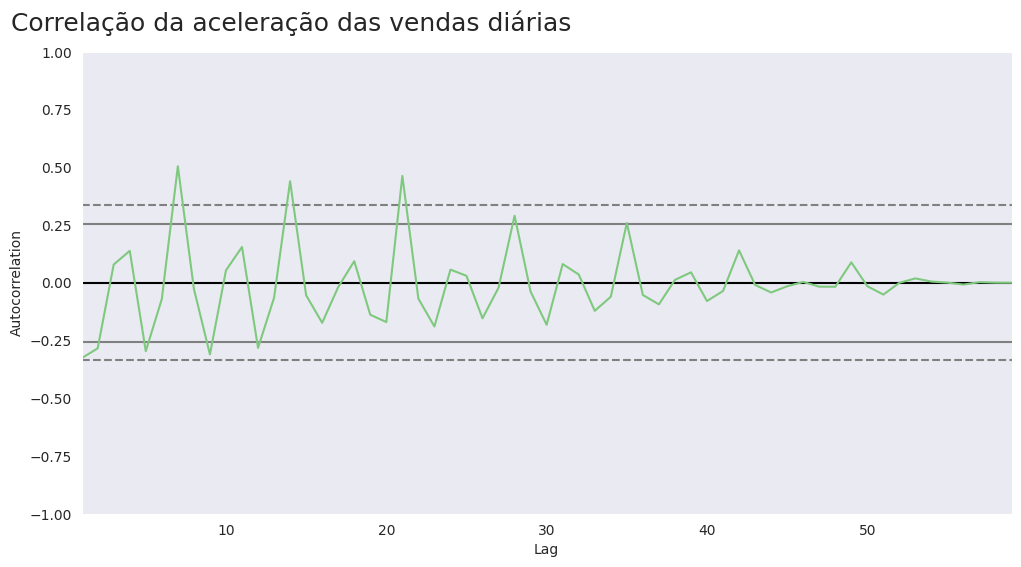

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# cafelura - analise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


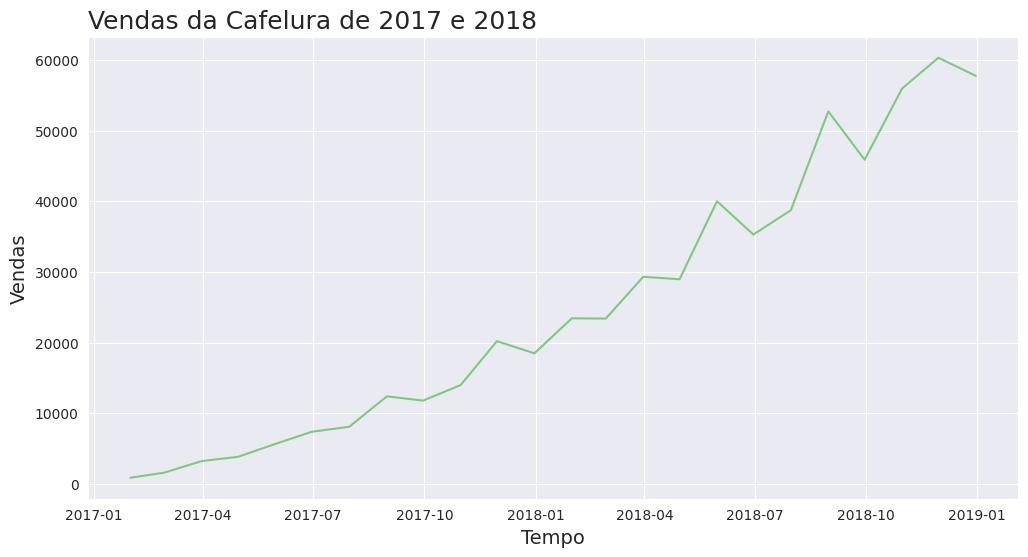

In [ ]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head

<bound method NDFrame.head of           mes  vendas  vendas_normalizadas
0  2017-01-31     880                110.0
1  2017-02-28    1600                200.0
2  2017-03-31    3240                324.0
3  2017-04-30    3840                480.0
4  2017-05-31    5670                630.0
5  2017-06-30    7380                820.0
6  2017-07-31    8096               1012.0
7  2017-08-31   12390               1239.0
8  2017-09-30   11792               1474.0
9  2017-10-31   13984               1748.0
10 2017-11-30   20200               2020.0
11 2017-12-31   18480               2310.0
12 2018-01-31   23436               2604.0
13 2018-02-28   23392               2924.0
14 2018-03-31   29304               3256.0
15 2018-04-30   28960               3620.0
16 2018-05-31   40000               4000.0
17 2018-06-30   35280               4410.0
18 2018-07-31   38720               4840.0
19 2018-08-31   52710               5271.0
20 2018-09-30   45864               5733.0
21 2018-10-31   55944   

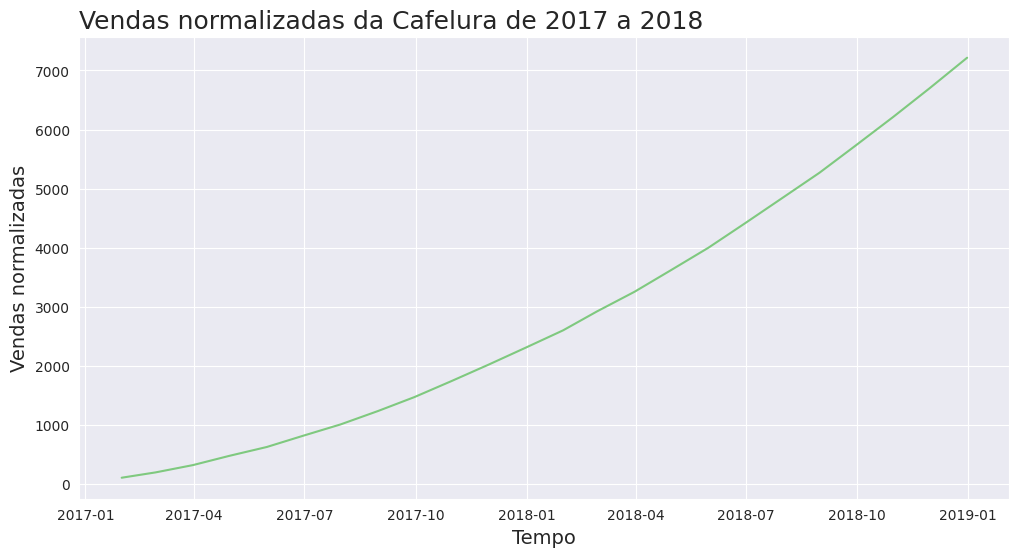

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

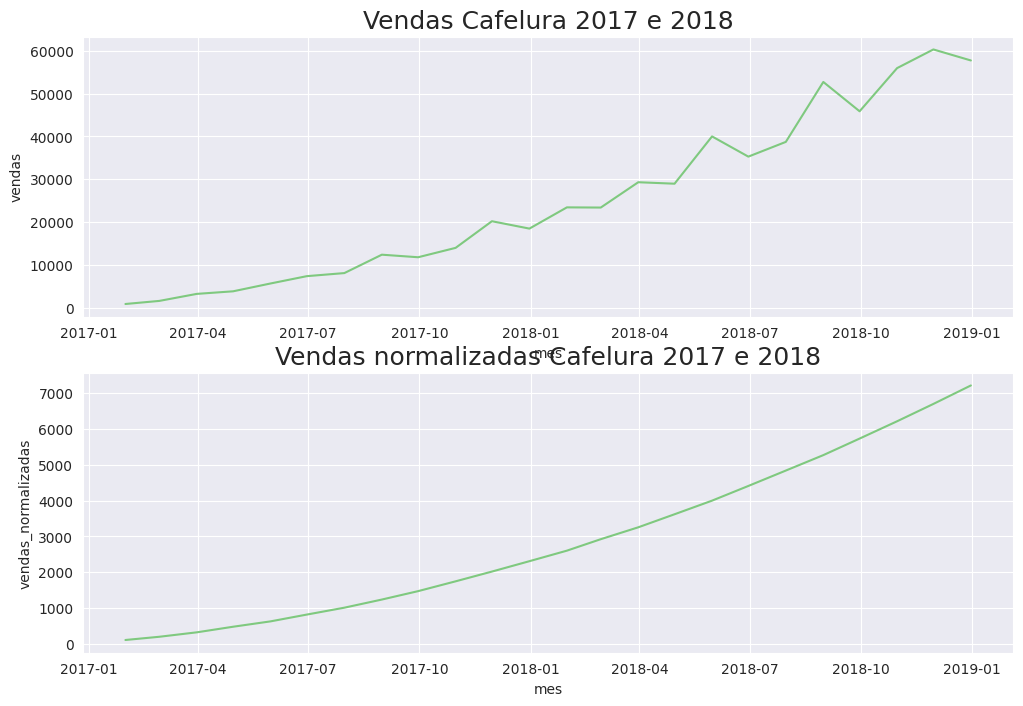

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

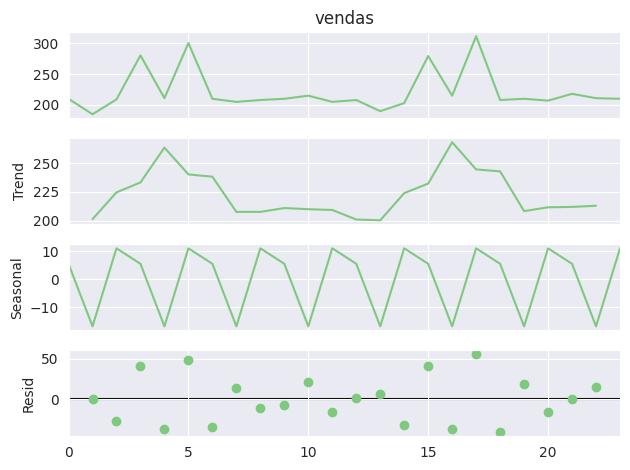

In [ ]:
resultado = seasonal_decompose(chocolura['vendas'],  period=3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid


In [ ]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia,
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


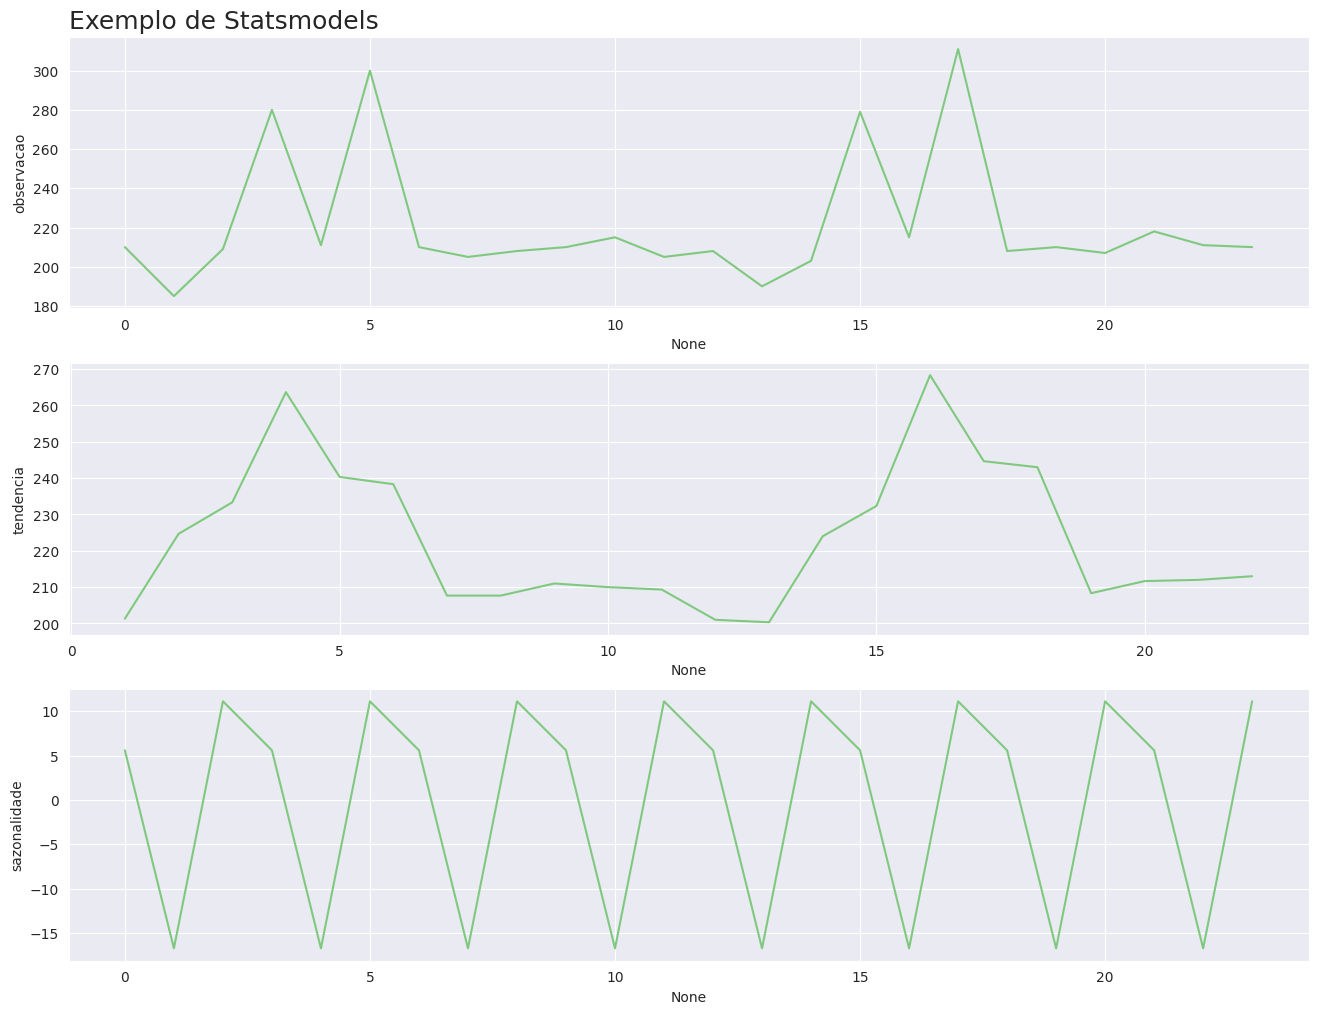

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# alucel analise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

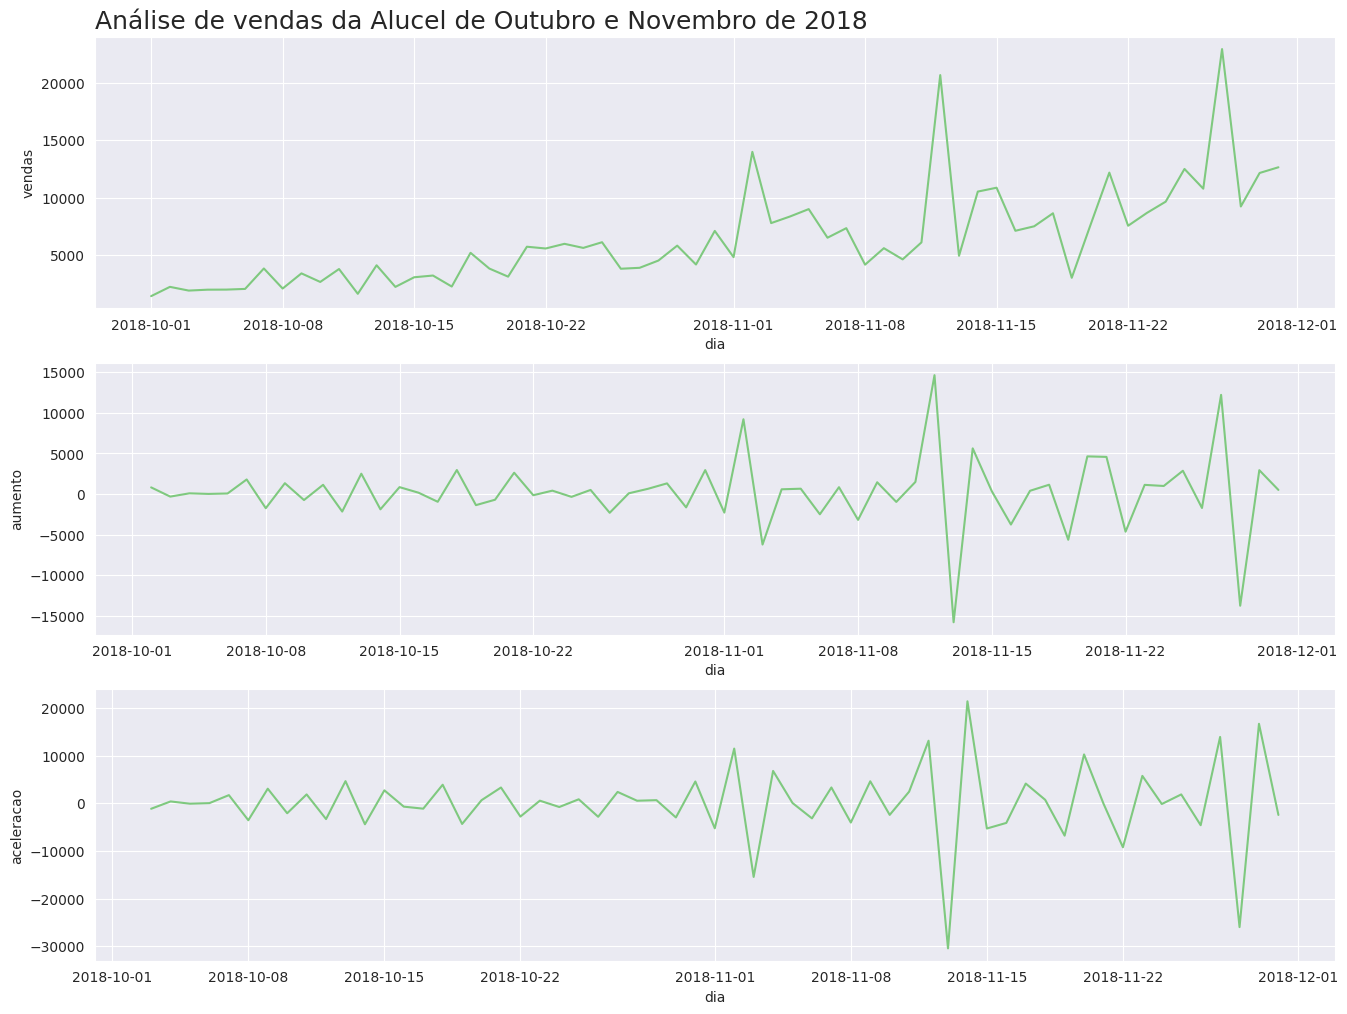

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

# media movel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

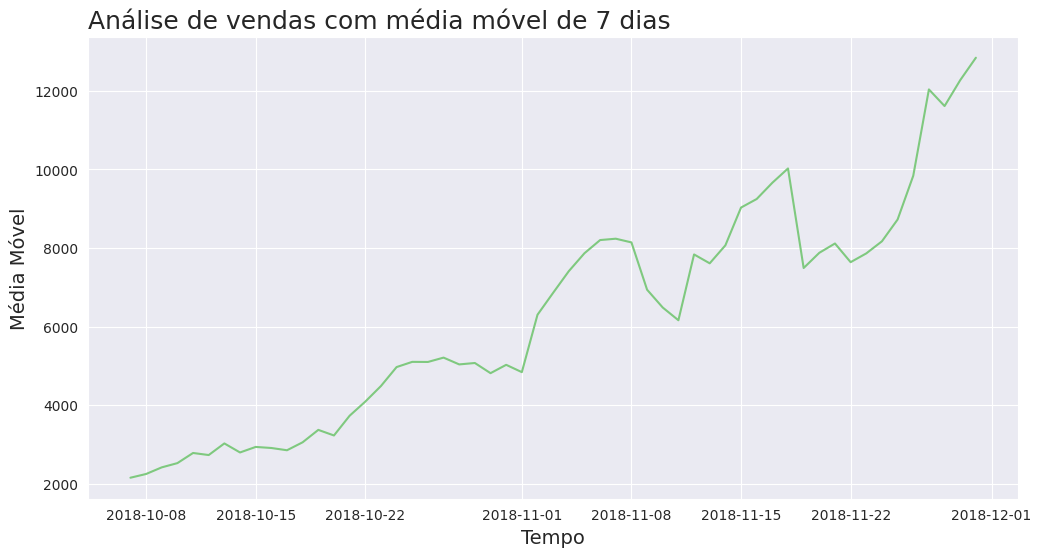

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

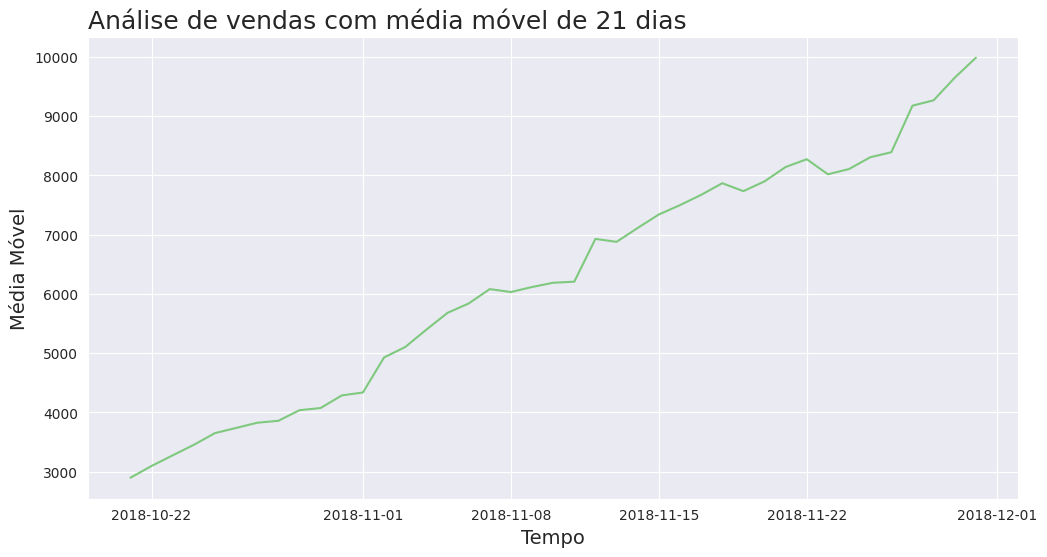

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

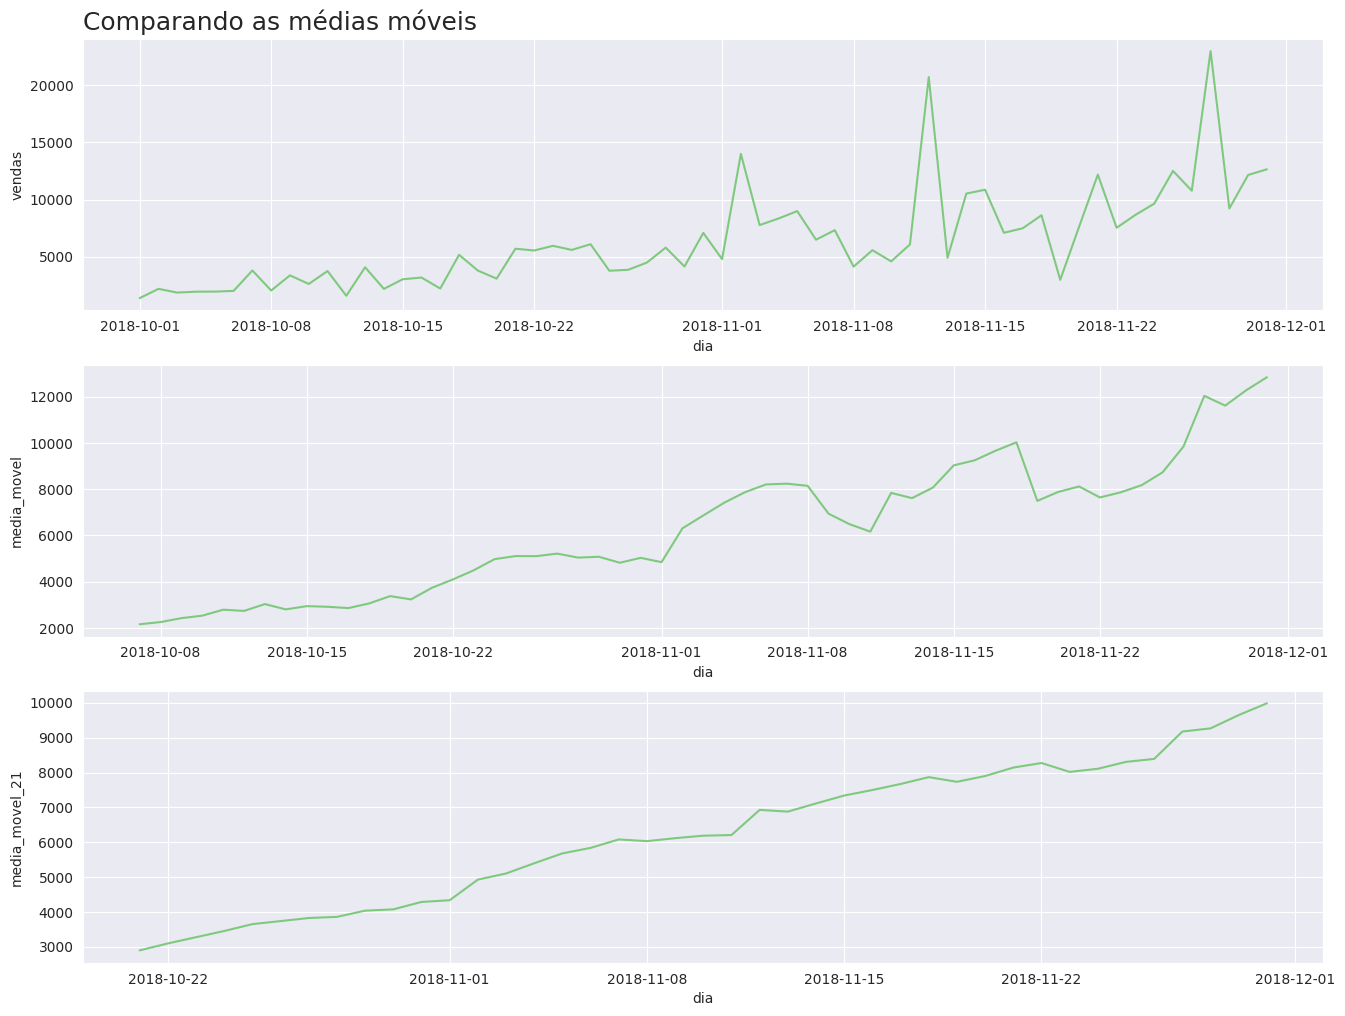

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')